In [1]:
%matplotlib inline
import cPickle
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.mlab import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression
from math import sqrt
from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDClassifier
from collections import Counter
from scipy.stats.mstats import mode
import sklearn
import scipy.stats as st

In [2]:
#function to unpickle the dataset
def unpickle(file):
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [27]:
#storing the unpickled data into a dictionary called my_data
my_data = {'data': unpickle("data_batch_1")['data'], 'labels': unpickle("data_batch_1")['labels']}
for each in range(2, 6):
    my_data['data'] = np.concatenate((my_data['data'], unpickle("data_batch_" + str(each))['data']), axis=0)
    my_data['labels'] = np.concatenate((my_data['labels'], unpickle("data_batch_" + str(each))['labels']), axis=0)
my_data

{'data': array([[ 59,  43,  50, ..., 140,  84,  72],
        [154, 126, 105, ..., 139, 142, 144],
        [255, 253, 253, ...,  83,  83,  84],
        ..., 
        [ 35,  40,  42, ...,  77,  66,  50],
        [189, 186, 185, ..., 169, 171, 171],
        [229, 236, 234, ..., 173, 162, 161]], dtype=uint8),
 'labels': array([6, 9, 9, ..., 9, 1, 1])}

In [4]:
# assigning the data and labels to respective lists
data = my_data['data']
labels = my_data['labels']
label_names = unpickle("batches.meta")['label_names']

In [29]:
# unpickling the test data and storing in a dictionary called test_data
test_data_dict = {}
test_data_dict.update(unpickle("test_batch"))
test_data = test_data_dict['data']
test_labels = test_data_dict['labels']
X_test = []
y_test = test_data_dict['labels']
test_data_dict

{'batch_label': 'testing batch 1 of 1',
 'data': array([[158, 159, 165, ..., 124, 129, 110],
        [235, 231, 232, ..., 178, 191, 199],
        [158, 158, 139, ...,   8,   3,   7],
        ..., 
        [ 20,  19,  15, ...,  50,  53,  47],
        [ 25,  15,  23, ...,  80,  81,  80],
        [ 73,  98,  99, ...,  94,  58,  26]], dtype=uint8),
 'filenames': ['domestic_cat_s_000907.png',
  'hydrofoil_s_000078.png',
  'sea_boat_s_001456.png',
  'jetliner_s_001705.png',
  'green_frog_s_001658.png',
  'crapaud_s_002124.png',
  'shooting_brake_s_000973.png',
  'green_frog_s_000634.png',
  'tabby_cat_s_001397.png',
  'wagon_s_002806.png',
  'plane_s_000026.png',
  'dustcart_s_000045.png',
  'toy_spaniel_s_001592.png',
  'lippizan_s_000752.png',
  'truck_s_000149.png',
  'dredger_s_001437.png',
  'puppy_s_001937.png',
  'cow_pony_s_000038.png',
  'boat_s_001450.png',
  'rana_clamitans_s_000570.png',
  'tennessee_walker_s_000353.png',
  'stealth_fighter_s_000354.png',
  'wapiti_s_001434.png',

In [6]:
#creating two empty lists for storing feature vectors
X_train =[]
y_train = my_data['labels']

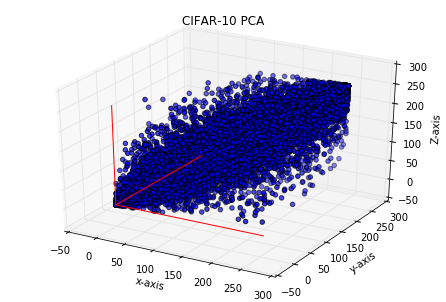

In [7]:
#plotting the feature points
x1 = []
y1 = []
z1 = []
for item in data:
 x1.append(item[0])
 y1.append(item[1])
 z1.append(item[2])
fig1 = plt.figure() 
ax = Axes3D(fig1) 
pltData = [x1,y1,z1] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') 


xLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) 
ax.plot(xLine[0], xLine[1], xLine[2], 'r') 
yLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) 
ax.plot(yLine[0], yLine[1], yLine[2], 'r')
zLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2])))
ax.plot(zLine[0], zLine[1], zLine[2], 'r') 
 
 
ax.set_xlabel("x-axis") 
ax.set_ylabel("y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("CIFAR-10 PCA")
plt.show()

In [8]:
# calculating the feature vectors by extracting features such as average intensity of all pixels and max & min of pixels(training set)
for i in range(0,50000):
    imgdt= data[i]
    lind= labels[i]
    average_rgb = []
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(0, 1024):
        redcount += imgdt[x]
    for x in range(1024, 2048):
        greencount += imgdt[x]
    for x in range(2048, 3072):
        bluecount += imgdt[x]
    average_rgb.append((redcount/3072, greencount/3072, bluecount/3072))
    #print redcount/3072, greencount/3072, bluecount/3072,label_names[lind]
    X_train.append([redcount/3072, greencount/3072, bluecount/3072,max(imgdt[:1024]),min(imgdt[:1024]),max(imgdt[1024:2048]),min(imgdt[1024:2048]),max(imgdt[2048:3072]),min(imgdt[2048:3072])])
    #y_train.append(label_names[lind])
    #print X_train , y_train

In [9]:
#calculating the feature vectors by extracting features such as average intensity of all pixels and max & min of pixels(test set)
for i in range(0,10000):
    imgdt= test_data[i]
    lind= test_labels[i]
    average_rgb = []
    redcount = 0;
    greencount = 0;
    bluecount = 0;
    for x in range(0, 1024):
        redcount += imgdt[x]
    for x in range(1024, 2048):
        greencount += imgdt[x]
    for x in range(2048, 3072):
        bluecount += imgdt[x]
    average_rgb.append((redcount/3072, greencount/3072, bluecount/3072))
    #print redcount/3072, greencount/3072, bluecount/3072,label_names[lind]
    X_test.append([redcount/3072, greencount/3072, bluecount/3072,max(imgdt[:1024]),min(imgdt[:1024]),max(imgdt[1024:2048]),min(imgdt[1024:2048]),max(imgdt[2048:3072]),min(imgdt[2048:3072])])
    #y_test.append(label_names[lind])
    #print X_test ,y_test

In [10]:
#computing the principle components
X = np.array(X_train)
pca = PCA(n_components=9)
abc = pca.fit_transform(X)
pca1 = pca.score(X)
abc,pca1

(array([[-24.14833477, -32.35974507, -16.66670355, ...,  -1.49537529,
          12.21078505,  -1.29997728],
        [-39.91916031, -16.9659685 ,   1.19083104, ...,   0.19308124,
          -0.93665218,  -0.16996702],
        [-41.26296814,   8.88495611,  -2.37242414, ...,  -2.05881267,
          -1.33775602,   0.91262473],
        ..., 
        [-36.99597917, -24.25368439,   4.5433118 , ...,   2.68352881,
          -8.53130691,   1.26681902],
        [-42.12540431, -18.90547895,  10.80797959, ...,   1.49885106,
          -3.29567798,  -0.32198457],
        [-42.36938313, -18.91481881,   0.25542716, ...,  -0.80710004,
           1.57489976,  -0.98849519]]), -34.040795534861402)

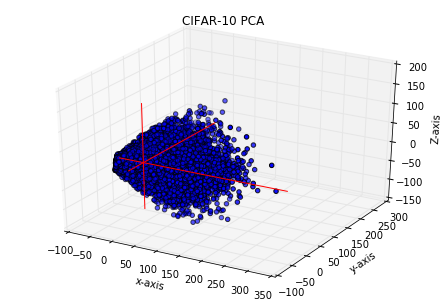

In [11]:
#plotting the principle components
x1 = []
y1 = []
z1 = []
for item in abc:
 x1.append(item[0])
 y1.append(item[1])
 z1.append(item[2])
fig1 = plt.figure() 
ax = Axes3D(fig1) 
pltData = [x1,y1,z1] 
ax.scatter(pltData[0], pltData[1], pltData[2], 'bo') 


xLine = ((min(pltData[0]), max(pltData[0])), (0, 0), (0,0)) 
ax.plot(xLine[0], xLine[1], xLine[2], 'r') 
yLine = ((0, 0), (min(pltData[1]), max(pltData[1])), (0,0)) 
ax.plot(yLine[0], yLine[1], yLine[2], 'r')
zLine = ((0, 0), (0,0), (min(pltData[2]), max(pltData[2])))
ax.plot(zLine[0], zLine[1], zLine[2], 'r') 
 
 
ax.set_xlabel("x-axis") 
ax.set_ylabel("y-axis")
ax.set_zlabel("Z-axis")
ax.set_title("CIFAR-10 PCA")
plt.show()

In [12]:
#creating dictionaries of each class of images in training set
class_data = {'airplane': [], 'automobile': [],'bird':[],'cat':[], 'deer':[], 'dog':[],'frog':[],'horse':[], 'ship':[], 'truck':[]}

In [13]:
#creating dictionaries of each class of images in test set
class_data_test = {'airplane': [], 'automobile': [],'bird':[],'cat':[], 'deer':[], 'dog':[],'frog':[],'horse':[], 'ship':[], 'truck':[]}

In [14]:
# appending each class images in the training set based on the labels
for each in range(0, 50000):
    if y_train[each] == 0:
        class_data['airplane'].append(X_train[each])
    if y_train[each] == 1:
        class_data['automobile'].append(X_train[each])
    if y_train[each] == 2:
        class_data['bird'].append(X_train[each])
    if y_train[each] == 3:
        class_data['cat'].append(X_train[each])
    if y_train[each] == 4:    
        class_data['deer'].append(X_train[each])
    if y_train[each] == 5:     
        class_data['dog'].append(X_train[each])
    if y_train[each] == 6:    
        class_data['frog'].append(X_train[each])
    if y_train[each] == 7:    
        class_data['horse'].append(X_train[each])
    if y_train[each] == 8:    
        class_data['ship'].append(X_train[each])
    if y_train[each] == 9:    
        class_data['truck'].append(X_train[each])

In [15]:
# appending each class images in the test set based on the labels
for each in range(0, 10000):
    if y_test[each] == 0:
        class_data_test['airplane'].append(X_test[each])
    if y_test[each] == 1:
        class_data_test['automobile'].append(X_test[each])
    if y_test[each] == 2:
        class_data_test['bird'].append(X_test[each])
    if y_test[each] == 3:
        class_data_test['cat'].append(X_test[each])
    if y_test[each] == 4:    
        class_data_test['deer'].append(X_test[each])
    if y_test[each] == 5:     
        class_data_test['dog'].append(X_test[each])
    if y_test[each] == 6:    
        class_data_test['frog'].append(X_test[each])
    if y_test[each] == 7:    
        class_data_test['horse'].append(X_test[each])
    if y_test[each] == 8:    
        class_data_test['ship'].append(X_test[each])
    if y_test[each] == 9:    
        class_data_test['truck'].append(X_test[each])

In [16]:
# function to calculate mean ,variance, and standard deviation for each class of images
def get_stats(class_name):
    mean = 0
    variance = 0
    std_deviation = 0
    size = len(class_data[class_name])
    for each in class_data[class_name]:
        mean += np.mean(each)
        variance += np.var(each)
        std_deviation += np.std(each)
    mean = mean / size
    variance = variance / size
    std_deviation = std_deviation / size
    return mean, variance, std_deviation, size

In [17]:
get_stats('airplane'), get_stats('automobile'),get_stats('bird'),get_stats('cat'), get_stats('deer'),get_stats('dog'),get_stats('frog'),get_stats('horse'),get_stats('ship'),get_stats('truck')

((101.14000000000019, 9186.7315308641955, 95.093844713083925, 5000),
 (96.456822222222286, 10951.485629629651, 104.42086521851176, 5000),
 (94.563133333333255, 8612.0997185185224, 91.828618364270682, 5000),
 (95.287511111111243, 9655.7521876543142, 97.507035901826043, 5000),
 (91.686133333333387, 8096.8109086419854, 88.892045863973735, 5000),
 (96.096311111111149, 9775.2430222221865, 98.265154900361438, 5000),
 (89.194599999999866, 8551.6024246913439, 91.705374390804835, 5000),
 (97.769088888889044, 10017.591886419719, 99.558161342159437, 5000),
 (100.37495555555546, 9655.7097234567918, 97.698784265548838, 5000),
 (98.745977777777881, 10920.082854320939, 104.25177821201143, 5000))

In [18]:
# function to calculate the t-value for the classes of images that are being compared
def tstat(class_name1, class_name2):
    X1 = get_stats(class_name1)[0]
    X2 = get_stats(class_name2)[0]
    S1 = get_stats(class_name1)[1]
    S2 = get_stats(class_name2)[1]
    N1=5000
    N2=5000
    t1= X1-X2
    t2= sqrt((S1/N1+S2/N2))
    t11=t1/t2
    S1 = get_stats(class_name1)[1]
    S2 = get_stats(class_name2)[1]
    sum1 =((get_stats(class_name1)[1]+get_stats(class_name2)[1]))*((get_stats(class_name1)[1]+get_stats(class_name2)[1]))
    s14 =(get_stats(class_name1)[1]*get_stats(class_name1)[1])
    s24=(get_stats(class_name2)[1]*get_stats(class_name2)[1])
    n1 = 5000*5000
    v1= 4999
    n2 = 5000*5000
    v2=4999
    sum2=  (s14/n1*v1 + s24/n2*v2)
    df1 = (sum1/sum2)
    df= df1/10000
    p_value = 2*st.t.cdf(-np.abs(t11),df)
    if p_value<= 0.5:
        print(False)
    else:
        print (True)
    return t11, df, p_value

In [19]:
tstat('airplane','deer')

False


(5.0848494012310415, 0.99623828653665114, 0.12430326279129779)

In [20]:
#performing k-means clustering with 10 clusters each for each class of images
k_means = KMeans(n_clusters=10, n_jobs=8)
k_means.fit(X_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=10, n_init=10,
    n_jobs=8, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [21]:
k_means.predict(class_data_test['airplane'])

array([8, 8, 6, 7, 5, 3, 6, 6, 9, 6, 6, 7, 3, 6, 5, 7, 2, 8, 0, 2, 3, 0, 6,
       5, 1, 7, 6, 7, 2, 0, 2, 5, 6, 0, 6, 6, 0, 2, 0, 7, 2, 6, 8, 6, 2, 6,
       8, 7, 5, 5, 6, 1, 6, 8, 2, 5, 0, 8, 7, 4, 2, 5, 5, 7, 7, 2, 6, 0, 6,
       8, 2, 6, 8, 7, 2, 7, 8, 3, 6, 7, 5, 1, 9, 2, 7, 9, 0, 7, 7, 6, 6, 2,
       7, 9, 8, 1, 8, 8, 6, 8, 7, 7, 2, 5, 8, 0, 0, 6, 5, 8, 5, 2, 1, 2, 0,
       7, 0, 8, 8, 6, 2, 8, 7, 2, 1, 7, 1, 5, 7, 4, 6, 4, 7, 5, 0, 5, 7, 5,
       6, 6, 4, 1, 0, 0, 0, 8, 7, 7, 6, 1, 8, 6, 2, 6, 0, 2, 0, 6, 4, 7, 6,
       2, 7, 5, 1, 1, 2, 8, 7, 0, 8, 4, 5, 6, 6, 2, 7, 4, 6, 0, 5, 5, 6, 6,
       1, 2, 2, 1, 6, 6, 6, 1, 7, 1, 6, 8, 5, 0, 8, 2, 4, 3, 7, 1, 6, 5, 8,
       8, 7, 7, 6, 0, 7, 7, 0, 6, 5, 4, 8, 9, 5, 1, 3, 0, 7, 5, 5, 0, 6, 6,
       4, 8, 1, 0, 6, 7, 6, 0, 7, 5, 0, 7, 7, 5, 6, 4, 7, 0, 6, 2, 4, 2, 5,
       1, 8, 6, 6, 4, 7, 1, 7, 1, 6, 4, 7, 1, 6, 6, 7, 2, 6, 1, 7, 4, 1, 2,
       1, 7, 7, 0, 4, 2, 1, 6, 1, 6, 6, 0, 8, 6, 9, 1, 7, 2, 4, 0, 0, 8, 8,
       5, 4,

In [22]:
# function to give the respective number of class of images in all the clusters
def get_count(class_name):
    return Counter(k_means.predict(class_data_test[class_name]))

In [23]:
get_count('truck')

Counter({0: 24,
         1: 44,
         2: 137,
         3: 15,
         4: 4,
         5: 346,
         6: 260,
         7: 140,
         8: 27,
         9: 3})

In [24]:
# function to get the probability of a particular class of images with the cluster number that it is present 
from collections import Counter
def get_prob(class_name):
    c = Counter(k_means.predict(class_data_test[class_name]))
    clusternumber = c.most_common(1)[0][0]
    val = c.most_common(1)[0][1]
    return clusternumber, val

In [25]:
get_prob('truck')

(5, 346)

In [26]:
# performing multinomial logistic regression to find out the accuracy of the classification of images in the training set with the testing set
model = LogisticRegression(solver = "lbfgs", multi_class = "multinomial")
model = model.fit(X_train, y_train)
print model.score(X_test, y_test)

0.2667
